In [2]:
from diffusers import DDPMPipeline

C:\Users\cesar\anaconda3\envs\graph_bridges\lib\site-packages\huggingface_hub\file_download.py:133: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\cesar\.cache\huggingface\hub. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to see activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)
diffusion_pytorch_model.safetensors not found


Fetching 4 files:   0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

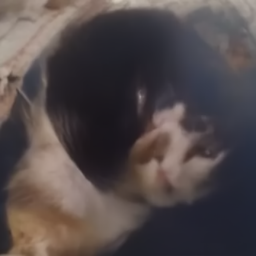

In [3]:
ddpm = DDPMPipeline.from_pretrained("google/ddpm-cat-256").to("cuda")

In [5]:
image = ddpm(num_inference_steps=25).images

  0%|          | 0/25 [00:00<?, ?it/s]

In [8]:
from diffusers import DDPMScheduler, UNet2DModel

scheduler = DDPMScheduler.from_pretrained("google/ddpm-cat-256")
model = UNet2DModel.from_pretrained("google/ddpm-cat-256").to("cuda")

In [9]:
scheduler.set_timesteps(50)

In [11]:
import torch

sample_size = model.config.sample_size
noise = torch.randn((1, 3, sample_size, sample_size)).to("cuda")

In [13]:
input = noise

for t in scheduler.timesteps:
    print(t)
    with torch.no_grad():
        noisy_residual = model(input, t).sample
    previous_noisy_sample = scheduler.step(noisy_residual, t, input).prev_sample
    input = previous_noisy_sample

tensor(980)
tensor(960)
tensor(940)
tensor(920)
tensor(900)
tensor(880)
tensor(860)
tensor(840)
tensor(820)
tensor(800)
tensor(780)
tensor(760)
tensor(740)
tensor(720)
tensor(700)
tensor(680)
tensor(660)
tensor(640)
tensor(620)
tensor(600)
tensor(580)
tensor(560)
tensor(540)
tensor(520)
tensor(500)
tensor(480)
tensor(460)
tensor(440)
tensor(420)
tensor(400)
tensor(380)
tensor(360)
tensor(340)
tensor(320)
tensor(300)
tensor(280)
tensor(260)
tensor(240)
tensor(220)
tensor(200)
tensor(180)
tensor(160)
tensor(140)
tensor(120)
tensor(100)
tensor(80)
tensor(60)
tensor(40)
tensor(20)
tensor(0)


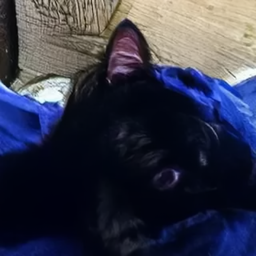

In [14]:
from PIL import Image
import numpy as np

image = (input / 2 + 0.5).clamp(0, 1)
image = image.cpu().permute(0, 2, 3, 1).numpy()[0]
image = Image.fromarray((image * 255).round().astype("uint8"))
image

# WITH TEXT

In [15]:
from PIL import Image
import torch
from transformers import CLIPTextModel, CLIPTokenizer
from diffusers import AutoencoderKL, UNet2DConditionModel, PNDMScheduler

vae = AutoencoderKL.from_pretrained("CompVis/stable-diffusion-v1-4", subfolder="vae")
tokenizer = CLIPTokenizer.from_pretrained("CompVis/stable-diffusion-v1-4", subfolder="tokenizer")
text_encoder = CLIPTextModel.from_pretrained("CompVis/stable-diffusion-v1-4", subfolder="text_encoder")
unet = UNet2DConditionModel.from_pretrained("CompVis/stable-diffusion-v1-4", subfolder="unet")